In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


In [3]:
NUM_WORDS = 10000

In [4]:
#(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
# use numpy 1.16.1
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(path="imdb.npz",num_words=NUM_WORDS)

Using TensorFlow backend.


In [5]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

In [6]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)

In [7]:
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

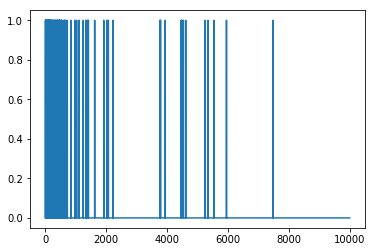

In [16]:
plt.plot(train_data[0])

In [17]:
# Create a Baseline Sequential Model
# Use RELU as activation hidden layer (16 hidden units in each layer)
# Use Sigmoid to be final layer

baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [18]:

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])


In [19]:
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Run with 20 epochs and batch size to be 512
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5330 - acc: 0.7729 - binary_crossentropy: 0.5330 - val_loss: 0.3823 - val_acc: 0.8728 - val_binary_crossentropy: 0.3823
Epoch 2/20
 - 4s - loss: 0.2712 - acc: 0.9062 - binary_crossentropy: 0.2712 - val_loss: 0.2850 - val_acc: 0.8862 - val_binary_crossentropy: 0.2850
Epoch 3/20
 - 4s - loss: 0.1854 - acc: 0.9358 - binary_crossentropy: 0.1854 - val_loss: 0.2867 - val_acc: 0.8846 - val_binary_crossentropy: 0.2867
Epoch 4/20
 - 4s - loss: 0.1454 - acc: 0.9513 - binary_crossentropy: 0.1454 - val_loss: 0.3107 - val_acc: 0.8794 - val_binary_crossentropy: 0.3107
Epoch 5/20
 - 4s - loss: 0.1163 - acc: 0.9624 - binary_crossentropy: 0.1163 - val_loss: 0.3389 - val_acc: 0.8770 - val_binary_crossentropy: 0.3389
Epoch 6/20
 - 4s - loss: 0.0913 - acc: 0.9726 - binary_crossentropy: 0.0913 - val_loss: 0.3743 - val_acc: 0.8701 - val_binary_crossentropy: 0.3743
Epoch 7/20
 - 4s - loss: 0.0688 - acc: 0.9823 - binary_crossentropy:

In [21]:
# Create a smaller Model with 4 hidden units only in each layer
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [22]:
smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Run smaller model with 20 echoes with 512 batch size
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5377 - acc: 0.7881 - binary_crossentropy: 0.5377 - val_loss: 0.4212 - val_acc: 0.8580 - val_binary_crossentropy: 0.4212
Epoch 2/20
 - 5s - loss: 0.3340 - acc: 0.8925 - binary_crossentropy: 0.3340 - val_loss: 0.3316 - val_acc: 0.8796 - val_binary_crossentropy: 0.3316
Epoch 3/20
 - 5s - loss: 0.2557 - acc: 0.9162 - binary_crossentropy: 0.2557 - val_loss: 0.2998 - val_acc: 0.8850 - val_binary_crossentropy: 0.2998
Epoch 4/20
 - 5s - loss: 0.2130 - acc: 0.9300 - binary_crossentropy: 0.2130 - val_loss: 0.2889 - val_acc: 0.8851 - val_binary_crossentropy: 0.2889
Epoch 5/20
 - 5s - loss: 0.1844 - acc: 0.9399 - binary_crossentropy: 0.1844 - val_loss: 0.2853 - val_acc: 0.8862 - val_binary_crossentropy: 0.2853
Epoch 6/20
 - 5s - loss: 0.1623 - acc: 0.9481 - binary_crossentropy: 0.1623 - val_loss: 0.2890 - val_acc: 0.8852 - val_binary_crossentropy: 0.2890
Epoch 7/20
 - 5s - loss: 0.1456 - acc: 0.9534 - binary_crossentropy:

In [24]:
# Create a Bigger Model
# with 512 hidden units in each layer

bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


In [25]:
bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [26]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.3534 - acc: 0.8458 - binary_crossentropy: 0.3534 - val_loss: 0.2929 - val_acc: 0.8783 - val_binary_crossentropy: 0.2929
Epoch 2/20
 - 6s - loss: 0.1437 - acc: 0.9458 - binary_crossentropy: 0.1437 - val_loss: 0.3195 - val_acc: 0.8778 - val_binary_crossentropy: 0.3195
Epoch 3/20
 - 6s - loss: 0.0428 - acc: 0.9872 - binary_crossentropy: 0.0428 - val_loss: 0.4437 - val_acc: 0.8702 - val_binary_crossentropy: 0.4437
Epoch 4/20
 - 6s - loss: 0.0055 - acc: 0.9992 - binary_crossentropy: 0.0055 - val_loss: 0.5959 - val_acc: 0.8706 - val_binary_crossentropy: 0.5959
Epoch 5/20
 - 6s - loss: 0.0010 - acc: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6764 - val_acc: 0.8708 - val_binary_crossentropy: 0.6764
Epoch 6/20
 - 7s - loss: 2.1589e-04 - acc: 1.0000 - binary_crossentropy: 2.1589e-04 - val_loss: 0.7194 - val_acc: 0.8717 - val_binary_crossentropy: 0.7194
Epoch 7/20
 - 6s - loss: 1.2177e-04 - acc: 1.0000 - binary_c

In [27]:
# Plot the training and validation loss
# The solid lines show the training loss, and the dashed lines show the validation loss
# A lower validation loss indicates a better model
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()



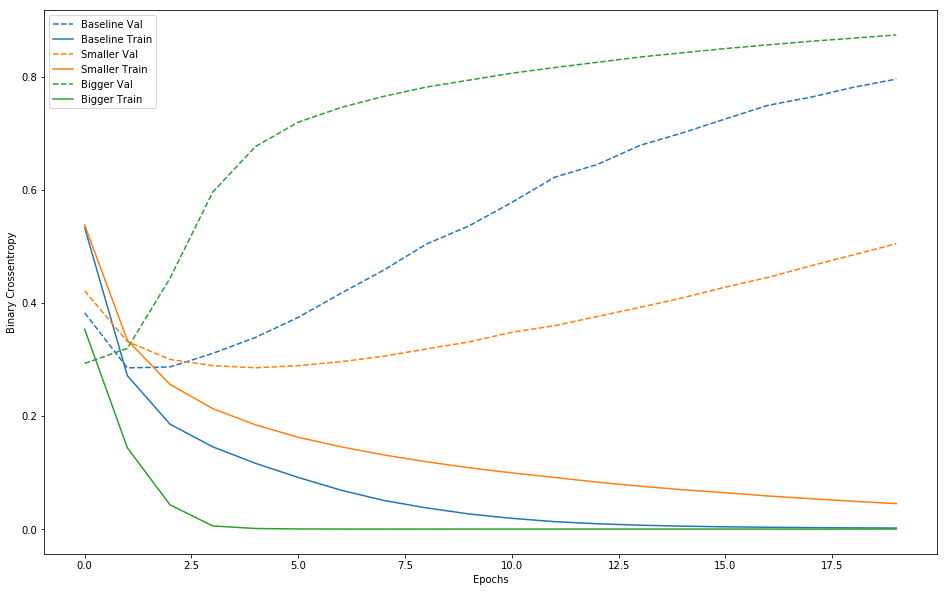

In [29]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])
# By comparing below diagram, he smaller network begins overfitting later than the baseline model (after 6 epochs rather than 4) 
# and its performance degrades much more slowly once it starts overfitting.
# larger network begins overfitting almost right away, after just one epoch, and overfits much more severely

In [30]:
#####  Weight Regularization #####
# 1) L1 Regularization -  where the cost added is proportional to the absolute value of the weights coefficients 
# (i.e. to what is called the "L1 norm" of the weights).
# 2) L2 Regularization - where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). 
# L2 regularization is also called weight decay in the context of neural networks.

l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [31]:
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [32]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5513 - acc: 0.7978 - binary_crossentropy: 0.5120 - val_loss: 0.3990 - val_acc: 0.8722 - val_binary_crossentropy: 0.3589
Epoch 2/20
 - 4s - loss: 0.3169 - acc: 0.9036 - binary_crossentropy: 0.2721 - val_loss: 0.3368 - val_acc: 0.8872 - val_binary_crossentropy: 0.2882
Epoch 3/20
 - 4s - loss: 0.2593 - acc: 0.9269 - binary_crossentropy: 0.2079 - val_loss: 0.3363 - val_acc: 0.8866 - val_binary_crossentropy: 0.2830
Epoch 4/20
 - 5s - loss: 0.2339 - acc: 0.9380 - binary_crossentropy: 0.1786 - val_loss: 0.3483 - val_acc: 0.8824 - val_binary_crossentropy: 0.2920
Epoch 5/20
 - 5s - loss: 0.2213 - acc: 0.9430 - binary_crossentropy: 0.1635 - val_loss: 0.3599 - val_acc: 0.8795 - val_binary_crossentropy: 0.3012
Epoch 6/20
 - 5s - loss: 0.2065 - acc: 0.9500 - binary_crossentropy: 0.1471 - val_loss: 0.3776 - val_acc: 0.8750 - val_binary_crossentropy: 0.3179
Epoch 7/20
 - 6s - loss: 0.1985 - acc: 0.9540 - binary_crossentropy:

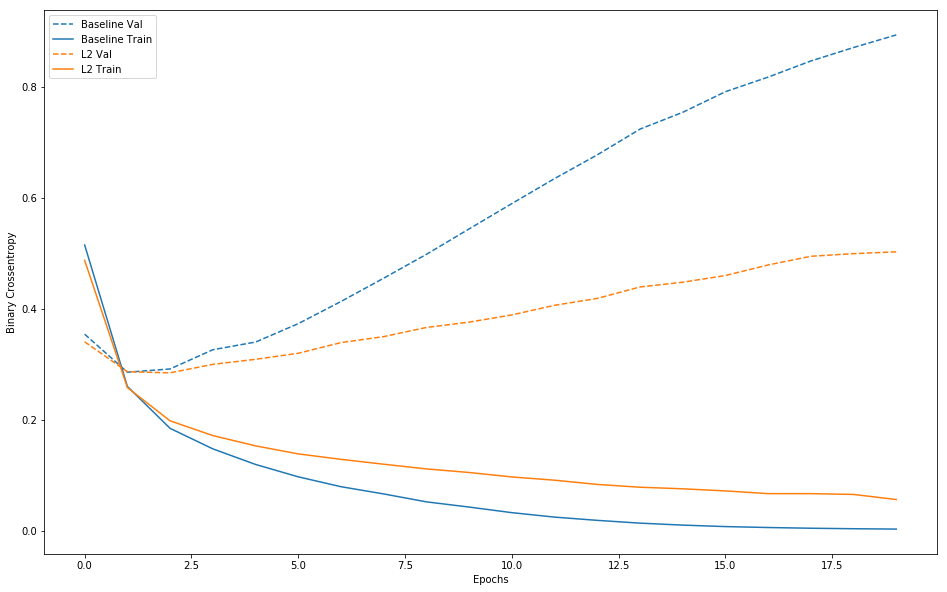

In [28]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

#L2 regularized model has become much more resistant to overfitting than the baseline model,
# (dotted line is lower than baseline model)
# even though both models have the same number of parameters.

In [33]:
# DropOut
# consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training
#  A given layer with a vector [0.2, 0.5, 1.3, 0.8, 1.1] during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]
# The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


In [34]:
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [35]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6286 - acc: 0.6492 - binary_crossentropy: 0.6286 - val_loss: 0.5155 - val_acc: 0.8542 - val_binary_crossentropy: 0.5155
Epoch 2/20
 - 5s - loss: 0.4874 - acc: 0.8022 - binary_crossentropy: 0.4874 - val_loss: 0.3833 - val_acc: 0.8798 - val_binary_crossentropy: 0.3833
Epoch 3/20
 - 5s - loss: 0.3890 - acc: 0.8618 - binary_crossentropy: 0.3890 - val_loss: 0.3210 - val_acc: 0.8831 - val_binary_crossentropy: 0.3210
Epoch 4/20
 - 5s - loss: 0.3271 - acc: 0.8930 - binary_crossentropy: 0.3271 - val_loss: 0.2906 - val_acc: 0.8854 - val_binary_crossentropy: 0.2906
Epoch 5/20
 - 5s - loss: 0.2770 - acc: 0.9071 - binary_crossentropy: 0.2770 - val_loss: 0.2834 - val_acc: 0.8872 - val_binary_crossentropy: 0.2834
Epoch 6/20
 - 5s - loss: 0.2408 - acc: 0.9198 - binary_crossentropy: 0.2408 - val_loss: 0.2894 - val_acc: 0.8854 - val_binary_crossentropy: 0.2894
Epoch 7/20
 - 5s - loss: 0.2097 - acc: 0.9288 - binary_crossentropy:

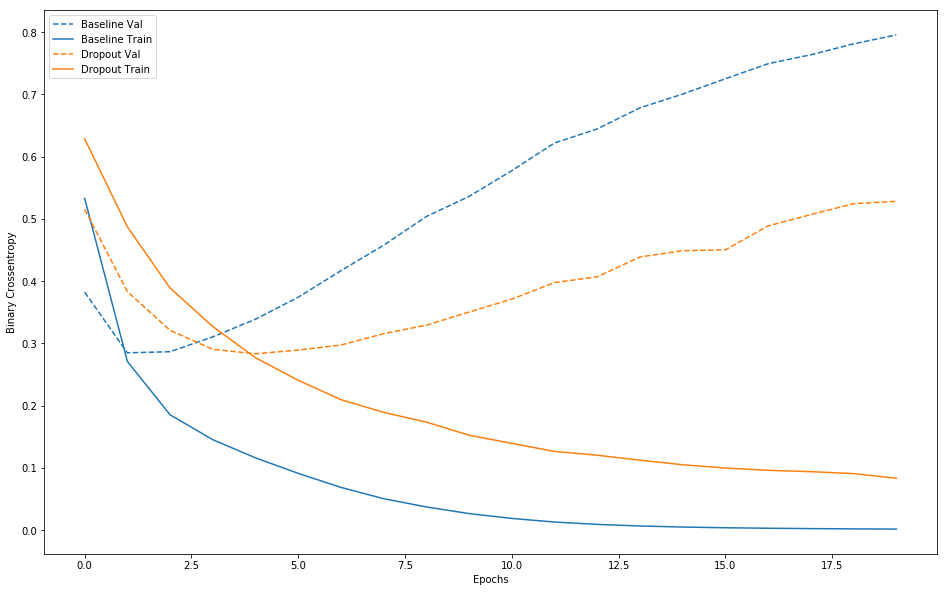

In [36]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])